In [2]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
device=torch.device('cpu')
print(device)

transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

cpu


In [4]:
train_path='C:/Users/Administrator/Desktop/200v/train'
test_path='C:/Users/Administrator/Desktop/200v/val'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)



In [5]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['cattle_0200', 'cattle_0300', 'cattle_0500', 'cattle_0600', 'cattle_0700', 'cattle_0800', 'cattle_0900', 'cattle_1000', 'cattle_1100', 'cattle_1200', 'cattle_1300', 'cattle_1400', 'cattle_1600', 'cattle_1700', 'cattle_1800', 'cattle_2000', 'cattle_2300', 'cattle_2320', 'cattle_2400', 'cattle_2510', 'cattle_2600', 'cattle_2700', 'cattle_2710', 'cattle_2800', 'cattle_2900', 'cattle_3000', 'cattle_3100', 'cattle_3200', 'cattle_3300', 'cattle_3812', 'cattle_3814', 'cattle_3819', 'cattle_3842', 'cattle_3844', 'cattle_3847', 'cattle_3852', 'cattle_3856', 'cattle_4208', 'cattle_4323', 'cattle_4326', 'cattle_4330', 'cattle_4339', 'cattle_4347', 'cattle_4363', 'cattle_4369', 'cattle_4381', 'cattle_4385', 'cattle_4422', 'cattle_4454', 'cattle_4456', 'cattle_4479', 'cattle_4488', 'cattle_4499', 'cattle_4537', 'cattle_4539', 'cattle_4545', 'cattle_4551', 'cattle_4568', 'cattle_4614', 'cattle_4668', 'cattle_4678', 'cattle_4679', 'cattle_4680', 'cattle_4685', 'cattle_4716', 'cattle_4733', 'cattle_4

In [6]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=200):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*75*75)
        output=self.fc(output)
        return output

In [7]:
model=ConvNet(num_classes=200).to(device)
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=20
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))
print(train_count,test_count)
best_accuracy=0.0

2744 777


Epoch: 0 Train Loss: tensor(55.7630) Train Accuracy: 0.33199708454810495 Test Accuracy: 0.25096525096525096
Epoch: 1 Train Loss: tensor(4.9769) Train Accuracy: 0.8403790087463557 Test Accuracy: 0.8622908622908623
Epoch: 2 Train Loss: tensor(1.5969) Train Accuracy: 0.9263848396501457 Test Accuracy: 0.8893178893178894
Epoch: 3 Train Loss: tensor(1.5719) Train Accuracy: 0.9354956268221575 Test Accuracy: 0.9009009009009009
Epoch: 4 Train Loss: tensor(0.8911) Train Accuracy: 0.9595481049562682 Test Accuracy: 0.9202059202059202
Epoch: 5 Train Loss: tensor(0.4421) Train Accuracy: 0.9744897959183674 Test Accuracy: 0.9420849420849421
Epoch: 6 Train Loss: tensor(0.8156) Train Accuracy: 0.9719387755102041 Test Accuracy: 0.9034749034749034
Epoch: 7 Train Loss: tensor(0.5025) Train Accuracy: 0.9686588921282799 Test Accuracy: 0.9163449163449163
Epoch: 8 Train Loss: tensor(0.5350) Train Accuracy: 0.9719387755102041 Test Accuracy: 0.9305019305019305
Epoch: 9 Train Loss: tensor(0.3776) Train Accuracy: 

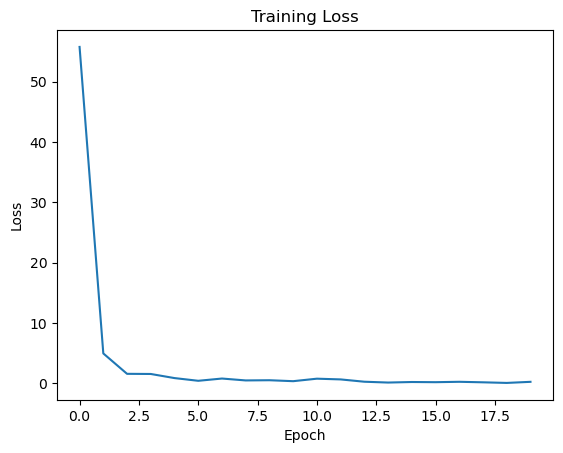

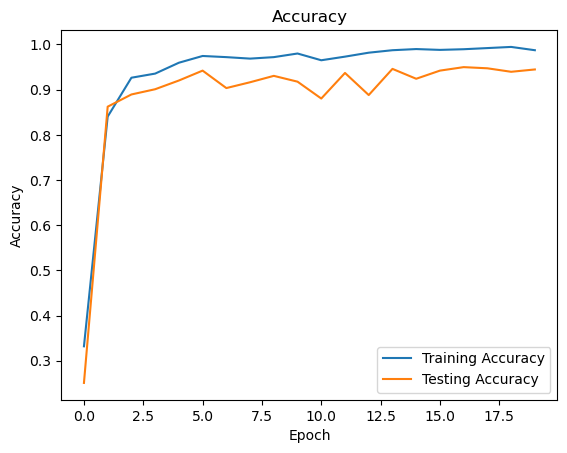

In [8]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    for i, (images,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.data*images.size(0)
        _,prediction = torch.max(outputs.data,1)
        train_accuracy += int(torch.sum(prediction==labels.data))
    train_accuracy = train_accuracy/train_count
    train_loss = train_loss/train_count
    model.eval()
    
    test_accuracy = 0.0
    for i, (images,labels) in enumerate(test_loader):
        with torch.no_grad():
            outputs = model(images)
        _,prediction = torch.max(outputs.data,1)
        test_accuracy += int(torch.sum(prediction==labels.data))
    test_accuracy = test_accuracy/test_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy = test_accuracy
        
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and testing accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

